# **Modality 1: Text-Based Mental Health Disorder Classification**

This module focuses on classifying mental health disorders using natural language text sourced from Reddit mental health communities. Each Reddit post (title + content) is processed to extract linguistic features that are indicative of psychological states. We use **TF-IDF** to vectorize the text and train machine learning models such as **Random Forest** to predict one of five possible mental health conditions:

*Stress (0), Depression (1), Bipolar Disorder (2), Personality Disorder (3), and Anxiety (4).*

This modality is essential for understanding how language patterns reflect mental health and enables early detection through self-expression analysis on online platforms.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install keras-utils

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import cv2
import zipfile
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ieee_internship/text_based.csv')

In [ ]:
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')
df['content'] = df['title'] + ' ' + df['text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['content']).toarray()
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_model = RandomForestClassifier(n_estimators=100, random_state=42)
text_model.fit(X_text_train, y_text_train)

y_text_pred = text_model.predict(X_text_test)
y_text_proba = text_model.predict_proba(X_text_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_text_test, y_text_pred)*100
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(y_text_test, y_text_pred))

Accuracy: 82.89%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       236
           1       0.72      0.84      0.77       241
           2       0.91      0.83      0.87       237
           3       0.78      0.77      0.78       240
           4       0.88      0.81      0.84       238

    accuracy                           0.83      1192
   macro avg       0.84      0.83      0.83      1192
weighted avg       0.83      0.83      0.83      1192



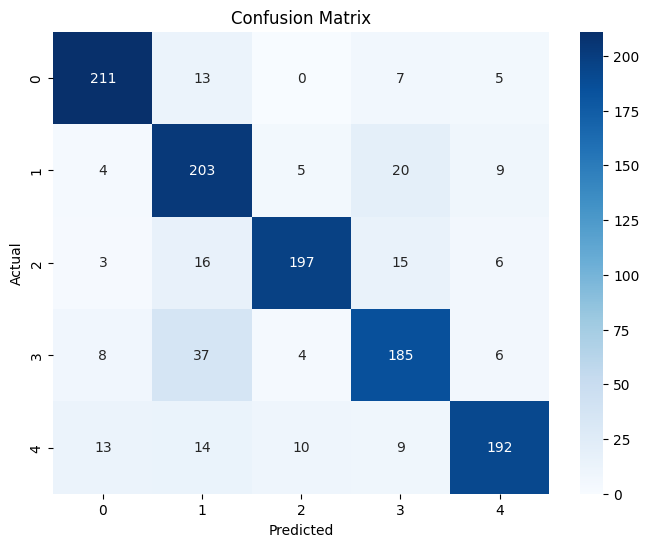

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_text_test, y_text_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

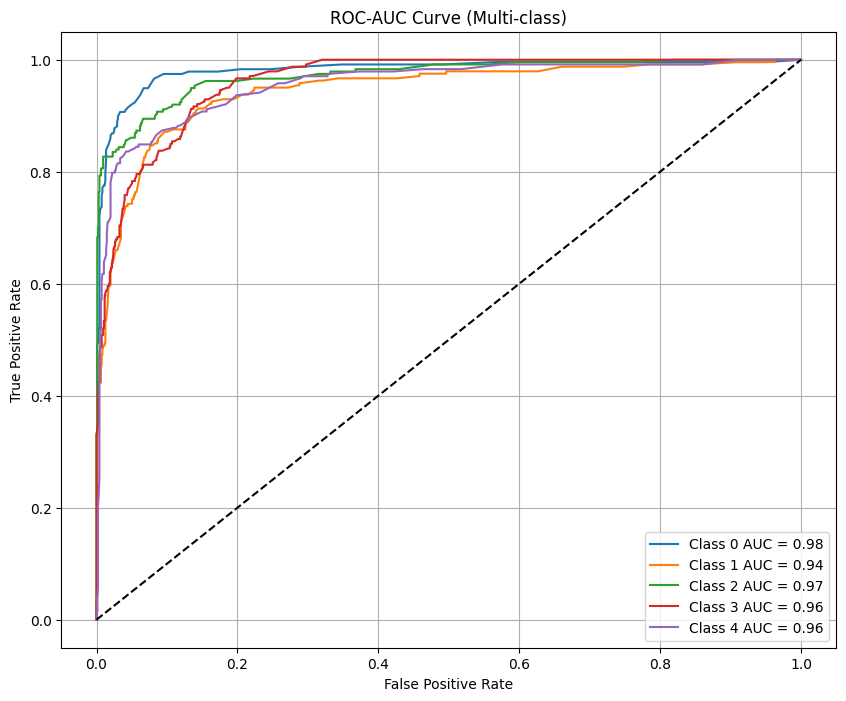

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize output for ROC-AUC
y_bin = label_binarize(y_text_test, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_text_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Multi-class)")
plt.legend()
plt.grid(True)
plt.show()

# Modality 2: Facial Expression-Based Mental Health Detection
Facial expressions provide crucial non-verbal cues about a person's emotional and mental state. In individuals experiencing mental health disorders like schizophrenia, depression, or bipolar disorder, emotional expressivity is often diminished (e.g., emotional flatness, lack of eye contact, or inconsistent microexpressions). This module detects such patterns using computer vision techniques.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import zipfile

In [ ]:
path = '/content/drive/My Drive/ieee_internship/fer2013.zip'
extract = '/content/drive/My Drive/ieee_internship/'
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall(extract)

In [ ]:
df_fer = pd.read_csv('/content/drive/MyDrive/ieee_internship/fer2013.csv')

In [ ]:
X_fer = []
for i in df_fer['pixels']:
    img = np.array(i.split(), dtype='float32').reshape(48, 48)
    X_fer.append(img)

X_fer = np.array(X_fer) / 255.0
X_fer = np.expand_dims(X_fer, -1)
y_fer = to_categorical(df_fer['emotion'])

In [ ]:
X_train_fer, X_val_fer, y_train_fer, y_val_fer = train_test_split(X_fer, y_fer, test_size=0.2,stratify=y_fer.argmax(axis=1),random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

fer_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

fer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fer_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = fer_model.fit(
    X_train_fer, y_train_fer,
    validation_data=(X_val_fer, y_val_fer),
    epochs=15,
    batch_size=64
)

Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 177ms/step - accuracy: 0.2638 - loss: 1.7946 - val_accuracy: 0.3923 - val_loss: 1.5657
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 178ms/step - accuracy: 0.3751 - loss: 1.5962 - val_accuracy: 0.4271 - val_loss: 1.4575
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 179ms/step - accuracy: 0.4153 - loss: 1.5088 - val_accuracy: 0.4728 - val_loss: 1.3934
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 79s 176ms/step - accuracy: 0.4457 - loss: 1.4423 - val_accuracy: 0.4809 - val_loss: 1.3473
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 176ms/step - accuracy: 0.4600 - loss: 1.4077 - val_accuracy: 0.4883 - val_loss: 1.3273
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 178ms/step - accuracy: 0.4772 - loss: 1.3695 - val_accuracy: 0.5092 - val_loss: 1.2968
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 196ms/step - accuracy: 0.4829 - loss: 1.3401 - val_accuracy: 0.5118 - val_loss: 1.2852
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 134s 177ms/step - accuracy: 0.4952 - loss: 

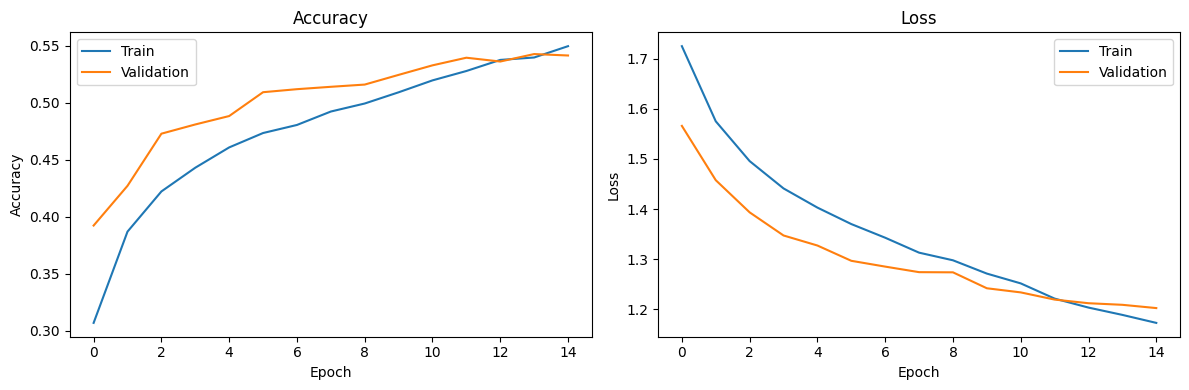

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Validation Accuracy: 54.14 %
              precision    recall  f1-score   support

       Angry       0.47      0.41      0.44       991
     Disgust       0.71      0.05      0.09       109
        Fear       0.46      0.17      0.25      1024
       Happy       0.72      0.78      0.75      1798
         Sad       0.37      0.52      0.44      1216
    Surprise       0.69      0.71      0.70       800
     Neutral       0.48      0.57      0.52      1240

    accuracy                           0.54      7178
   macro avg       0.56      0.46      0.45      7178
weighted avg       0.54      0.54      0.53      7178



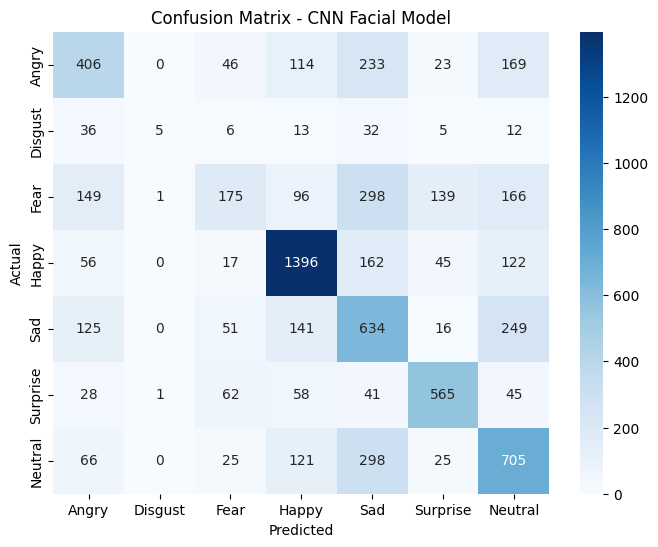

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

y_pred = fer_model.predict(X_val_fer)
y_pred_labels = y_pred.argmax(axis=1)
y_true_labels = y_val_fer.argmax(axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)*100
print(f"Validation Accuracy: {accuracy:.2f} %" )
print(classification_report(y_true_labels, y_pred_labels, target_names=[
    'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'
]))

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=[
    'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'
], yticklabels=[
    'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'
])
plt.title("Confusion Matrix - CNN Facial Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

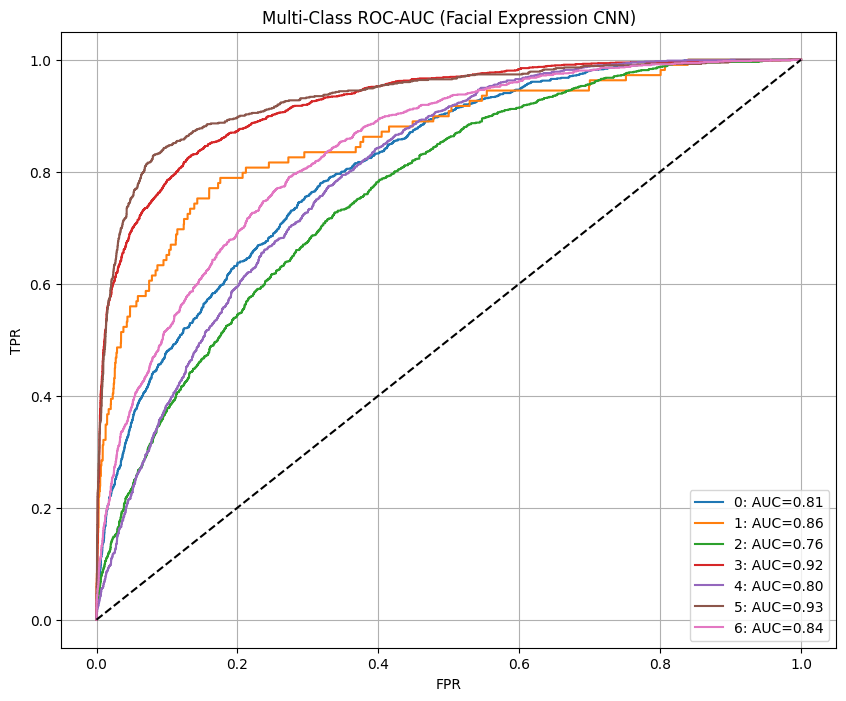

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_true_labels, classes=range(7))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label=f"{i}: AUC={roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multi-Class ROC-AUC (Facial Expression CNN)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()

# Modality 3: Voice-Based Mental Health Detection (Audio Modality)
In this section, we’ll simulate or use real voice/audio features to detect emotional cues that may correlate with mental health conditions like stress, anxiety, bipolar disorder, or depression.

In [ ]:
import os
import librosa
import numpy as np
from tqdm import tqdm

In [ ]:
path = '/content/drive/My Drive/ieee_internship/CREMA-D.zip'
extract = '/content/drive/My Drive/ieee_internship/CREMA-D'
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall(extract)

In [ ]:
DATA_PATH = '/content/drive/My Drive/ieee_internship/CREMA-D/AudioWAV'

In [ ]:
emotion_map = {
    "HAP": 0,  # Happiness → approximated to normal/stable
    "SAD": 1,  # Sadness → Depression
    "ANG": 2,  # Anger → Bipolar
    "FEA": 3,  # Fear → Anxiety
    "DIS": 4   # Disgust → Personality
}

In [ ]:
# Storage
X_audio = []
y_audio = []

# Load and extract MFCC features
for file in tqdm(os.listdir(DATA_PATH)):
    if file.endswith(".wav"):
        emotion_label = file.split("_")[2]
        if emotion_label in emotion_map:
            y = emotion_map[emotion_label]
            audio_path = os.path.join(DATA_PATH, file)
            signal, sr = librosa.load(audio_path, sr=22050)
            mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
            mfcc_scaled = np.mean(mfcc.T, axis=0)  # shape (40,)
            X_audio.append(mfcc_scaled)
            y_audio.append(y)

X_audio = np.array(X_audio)
y_audio = np.array(y_audio)

print("Audio feature shape:", X_audio.shape)
print("Labels shape:", y_audio.shape)

100%|██████████| 7442/7442 [04:53<00:00, 25.34it/s]

Audio feature shape: (6355, 40)
Labels shape: (6355,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# One-hot encode labels
y_audio_cat = to_categorical(y_audio, num_classes=5)

# Train-test split
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split(
    X_audio, y_audio_cat, test_size=0.2, random_state=42, stratify=y_audio)

# Scale features
scaler = StandardScaler()
X_audio_train = scaler.fit_transform(X_audio_train)
X_audio_test = scaler.transform(X_audio_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape, Conv1D, MaxPooling1D, Flatten

model_audio = Sequential([
    Reshape((40, 1), input_shape=(40,)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model_audio.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_audio.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       155,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,677 (612.02 KB)

 Trainable params: 156,677 (612.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_audio = model_audio.fit(
    X_audio_train, y_audio_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_audio_test, y_audio_test)
)

Epoch 1/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3460 - loss: 1.4619 - val_accuracy: 0.4776 - val_loss: 1.2698
Epoch 2/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4518 - loss: 1.2877 - val_accuracy: 0.5028 - val_loss: 1.2408
Epoch 3/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4653 - loss: 1.2415 - val_accuracy: 0.4917 - val_loss: 1.2254
Epoch 4/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4711 - loss: 1.2175 - val_accuracy: 0.4807 - val_loss: 1.2240
Epoch 5/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4960 - loss: 1.2084 - val_accuracy: 0.5161 - val_loss: 1.1930
Epoch 6/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5211 - loss: 1.1612 - val_accuracy: 0.5106 - val_loss: 1.1835
Epoch 7/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5265 - loss: 1.1548 - val_accuracy: 0.5350 - val_loss: 1.1753
Epoch 8/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5358 - loss: 1.1301 - val_accuracy: 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 52.48 %
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       254
           1       0.58      0.66      0.62       254
           2       0.70      0.61      0.65       254
           3       0.41      0.41      0.41       255
           4       0.50      0.42      0.46       254

    accuracy                           0.52      1271
   macro avg       0.53      0.52      0.52      1271
weighted avg       0.53      0.52      0.52      1271



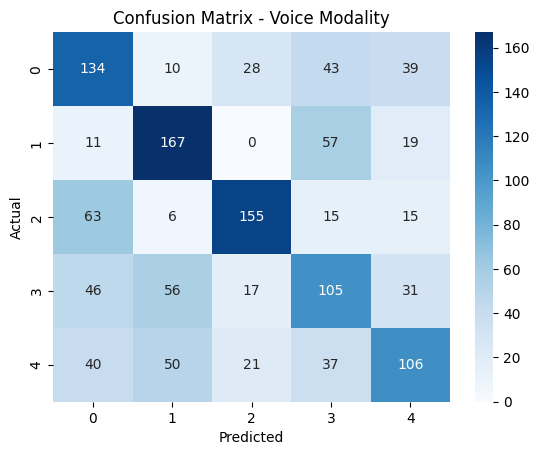

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred_proba = model_audio.predict(X_audio_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_audio_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)*100
print(f"Accuracy: {accuracy:.2f} %")

# Classification report
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Voice Modality")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

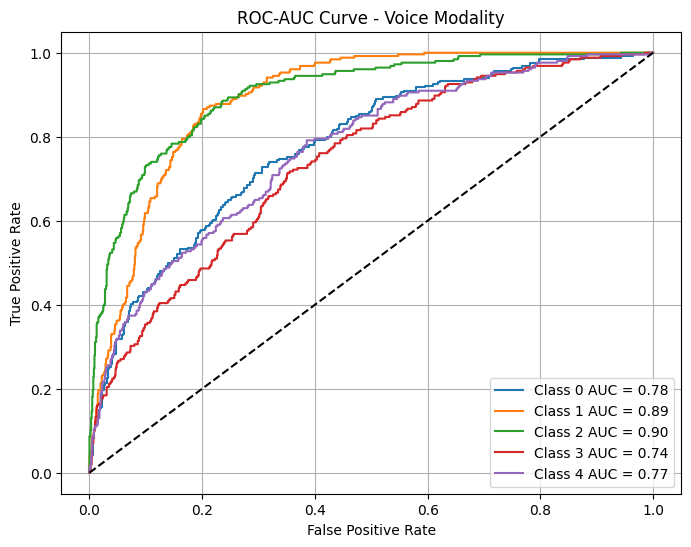

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize for ROC
y_bin = label_binarize(y_true, classes=[0,1,2,3,4])
n_classes = y_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve - Voice Modality")
plt.legend()
plt.grid(True)
plt.show()

# Fusion and Final Output.
Late Fusion Pipeline

In [ ]:
from tensorflow.keras.utils import to_categorical

# convert class predictions to one-hot encoding (probabilities)
text_preds = text_model.predict(X_text_test)      # shape: (1192,)
text_preds_proba = to_categorical(text_preds, num_classes=5)  # shape: (1192, 5)

In [ ]:
import numpy as np

# STEP 1: Get the raw per-frame predictions from your facial model
facial_preds_proba = fer_model.predict(X_val_fer)  # shape: (35887, 7)

# STEP 2: Reduce to per-sample by averaging every 'n' frames
frames_per_sample = 30  # estimate, change if you know exact
num_samples = 1192  # should match your test samples

facial_preds_aggregated = []

for i in range(num_samples):
    start = i * frames_per_sample
    end = start + frames_per_sample
    sample_preds = facial_preds_proba[start:end, :5]  # Only first 5 classes
    mean_preds = np.mean(sample_preds, axis=0)      # Average over frames
    facial_preds_aggregated.append(mean_preds)

# STEP 3: Now assign to `facial_preds_proba`
facial_preds_proba = np.array(facial_preds_aggregated)  # shape: (1192, 5)


225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
audio_preds = model_audio.predict(X_audio_test)
if audio_preds.ndim == 2 and audio_preds.shape[1] == 5:
    audio_preds = np.argmax(audio_preds, axis=1)  # shape: (1489,)
audio_preds_proba = to_categorical(audio_preds, num_classes=5)
audio_preds_proba = audio_preds_proba[:1192]

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print("Text shape:", text_preds_proba.shape)
print("Facial shape:", facial_preds_proba.shape)
print("Audio shape:", audio_preds_proba.shape)


Text shape: (1192, 5)
Facial shape: (1192, 5)
Audio shape: (1192, 5)


In [ ]:
import numpy as np

# Average predicted probabilities
fused_proba = (text_preds_proba + facial_preds_proba + audio_preds_proba) / 3

# Final predicted class (argmax)
fused_preds = np.argmax(fused_proba, axis=1)

In [ ]:
# Recommended: Weighted fusion (Text dominates)
fused_proba = (0.6 * text_preds_proba) + (0.2 * facial_preds_proba) + (0.2 * audio_preds_proba)
fused_preds = np.argmax(fused_proba, axis=1)

Fused Model Accuracy: 32.30 %

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.99      0.38       236
           1       0.67      0.17      0.28       241
           2       0.95      0.15      0.26       237
           3       0.88      0.15      0.26       240
           4       0.90      0.16      0.27       238

    accuracy                           0.32      1192
   macro avg       0.73      0.32      0.29      1192
weighted avg       0.73      0.32      0.29      1192



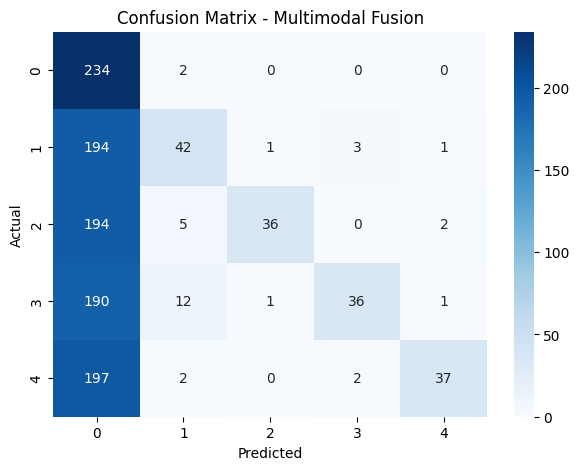

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Ground truth
y_true = y_text_test  # assuming this is already label-encoded

# Accuracy
accuracy = accuracy_score(y_true, fused_preds)*100
print(f"Fused Model Accuracy: {accuracy:.2f} %")

# Classification report
print("\nClassification Report:\n", classification_report(y_true, fused_preds))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_true, fused_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Multimodal Fusion")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import numpy as np

# Check for NaNs
print("Any NaNs in fused_proba?", np.isnan(fused_proba).any())

# Optional: Print how many and where
print("Total NaNs:", np.isnan(fused_proba).sum())


Any NaNs in fused_proba? True
Total NaNs: 4760


In [ ]:
fused_proba = np.nan_to_num(fused_proba, nan=0.0)

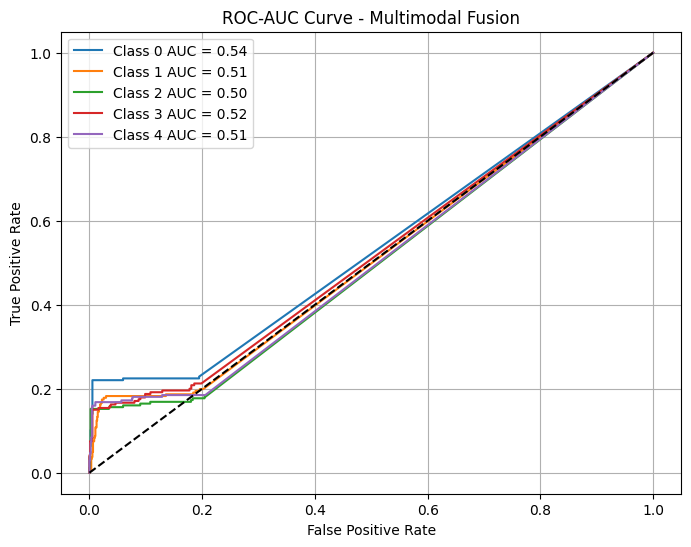

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize ground truth
y_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], fused_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-AUC Curve - Multimodal Fusion")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-1-1874978913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modalities, y=accuracies, palette='Blues_d')


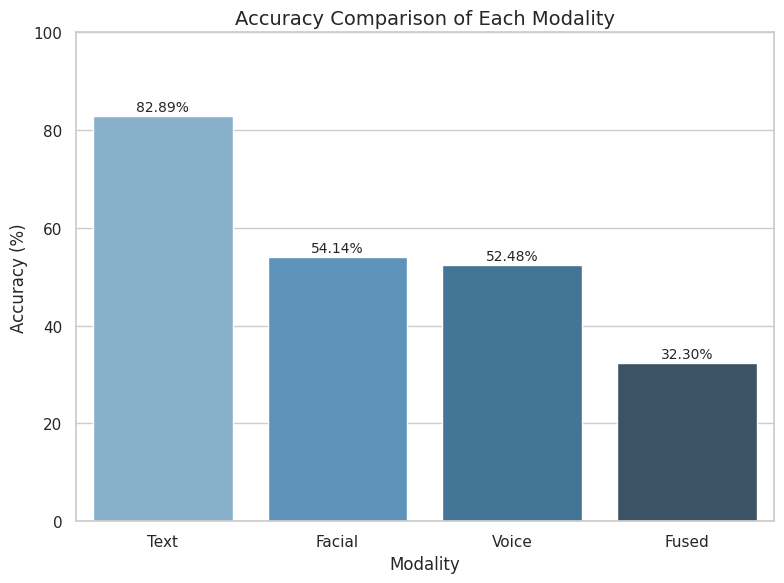

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for modalities and their accuracies
modalities = ['Text', 'Facial', 'Voice', 'Fused']
accuracies = [82.89, 54.14, 52.48, 32.30]

# Set seaborn style
sns.set(style="whitegrid")

# Create Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=modalities, y=accuracies, palette='Blues_d')

# Add title and labels
plt.title('Accuracy Comparison of Each Modality', fontsize=14)
plt.xlabel('Modality', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)

# Annotate accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()